In [2]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 LENOVO HUNGARIAN GRAND PRIX 2025
The Hungarian Grand Prix (Hungarian: Magyar Nagydíj) is a motor race held in Hungary. The first edition was held on 21 June 1936 on a circuit laid out in a park near the centre of Budapest.
 The manufacturers Mercedes-Benz, Auto Union and Ferrari sent three cars each and the event attracted 
cars each, and the event attracted a large crowd. Without 
However, politics and the approaching Second World War meant the end of motor racing for more than fifty years.
The first Formula 1 Grand Prix to be held east of the Iron Curtain was the 1986 Hungarian Grand Prix at the Hungaroring racetrack in Mogyoród, near Budapest. Like the Dutch Grand Prix, which it replaced, the Hungarian Grand Prix was held in 1986 at the Hungaroring in Mogyoród, near Budapest,
 which it replaced, the Hungarian Grand Prix is held in the middle of the European summer. 
European summer. Due to the climate in that region, the first race to be rained out was the 2006 Hungarian Grand Prix.
 rained in 2006. The Hungarian Grand Prix attracts fans from 
various countries in the region that do not have a local Grand Prix, e.g. from the Scandinavian 
Scandinavian and Eastern European countries. Formula 3000 International, GP2 Series and FIA Formula 2 have held preliminary races at every edition since 1998.

Due to the nature of the track, which is narrow, winding and often dusty from lack of use, the Hungarian Grand Prix usually sees groups of up to six cars all following a slightly slower car that cannot be lapped. This is one of the circuits where pit stop strategy is most crucial. The best example of this was seen at the 1998 Grand Prix when Michael Schumacher's Ferrari team changed strategy mid-race and managed to put their driver in a position to win at the end of the stops. Overtaking between drivers is rare at this circuit, but a notable exception was produced by Nigel Mansell in 1989 when he started from 12th position and overtook car by car and ended up taking the lead by taking advantage of Ayrton Senna being stuck passing a slower driver. In 2003 modifications were made to the circuit in an attempt to make overtaking more feasible.

Other great moments at this circuit include the first victory for Damon Hill (in 1993), and for Fernando Alonso (in 2003). In 2001, Michael Schumacher equalled Alain Prost in number of victories at this circuit.

In 2006, Jenson Button took his first Formula 1 victory, and Pedro de la Rosa his first podium. This race was the first ever Formula 1 race at this circuit to be held in wet conditions, and was notable for its high number of retirements, including those of Michael Schumacher and Fernando Alonso.

In 2016 the race extended its current contract until 2021 for a further five years, securing the GP until 2026.
Source: Wikipedia

## Obtain session information

In [11]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='HUN')

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
0,1266,9921,Budapest,2025-08-01T11:30:00+00:00,2025-08-01T12:30:00+00:00,Practice,Practice 1,14,HUN,Hungary,4,Hungaroring,02:00:00,2025


## Free Practice 1
### Obtain setup

In [12]:
practice = libraryDataF1.obtain_information('laps',session_key=9921)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9921)
drivers = libraryDataF1.obtain_information('drivers',session_key=9921)

In [13]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Centering on straight is not a good strategy here in Hungary. Hence, top speed is not important. 

Aston Ferrari and Williams are good on straights so they will have a little advantage in sector 1.

Alpine has a lack of power and due to the configuration they centered on corners so this lack is relevant.

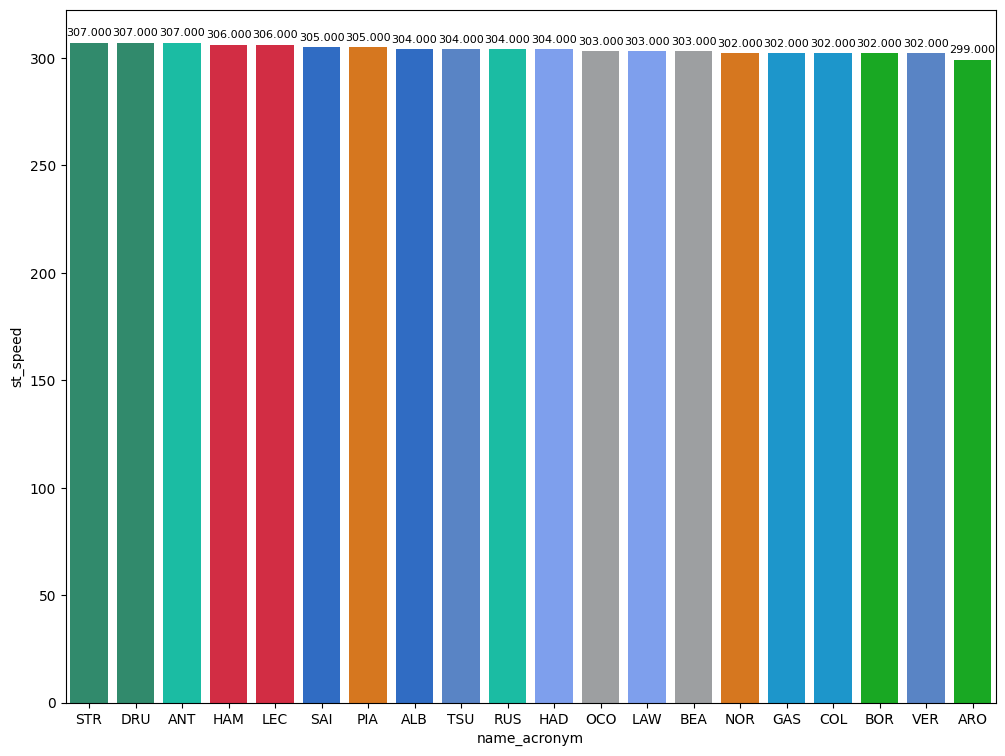

In [14]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

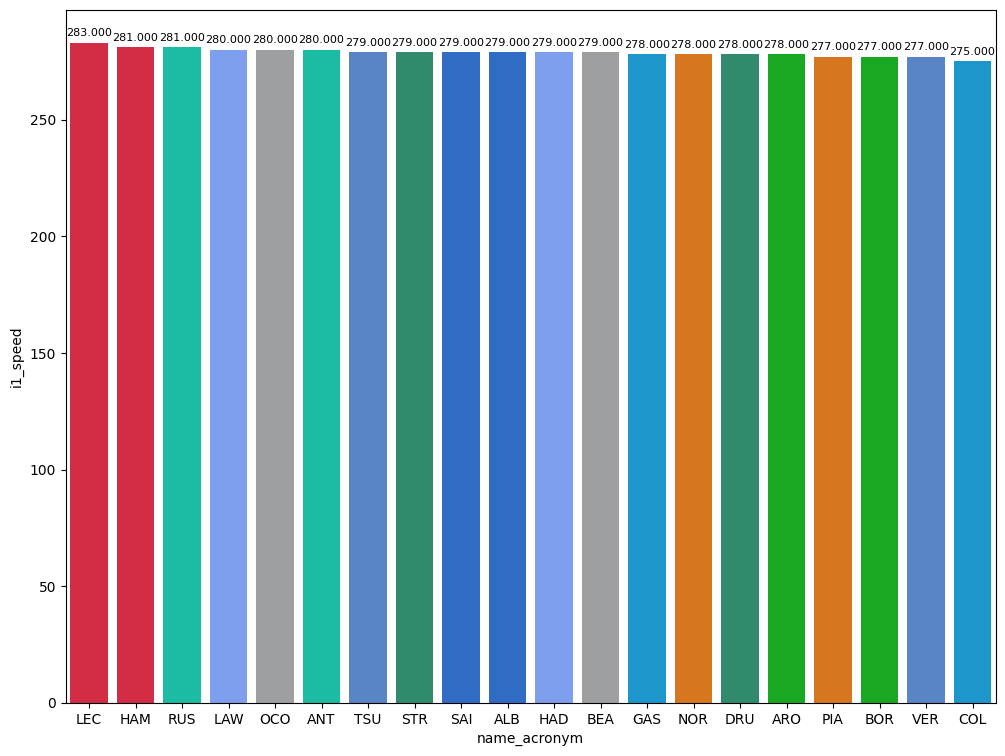

In [15]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

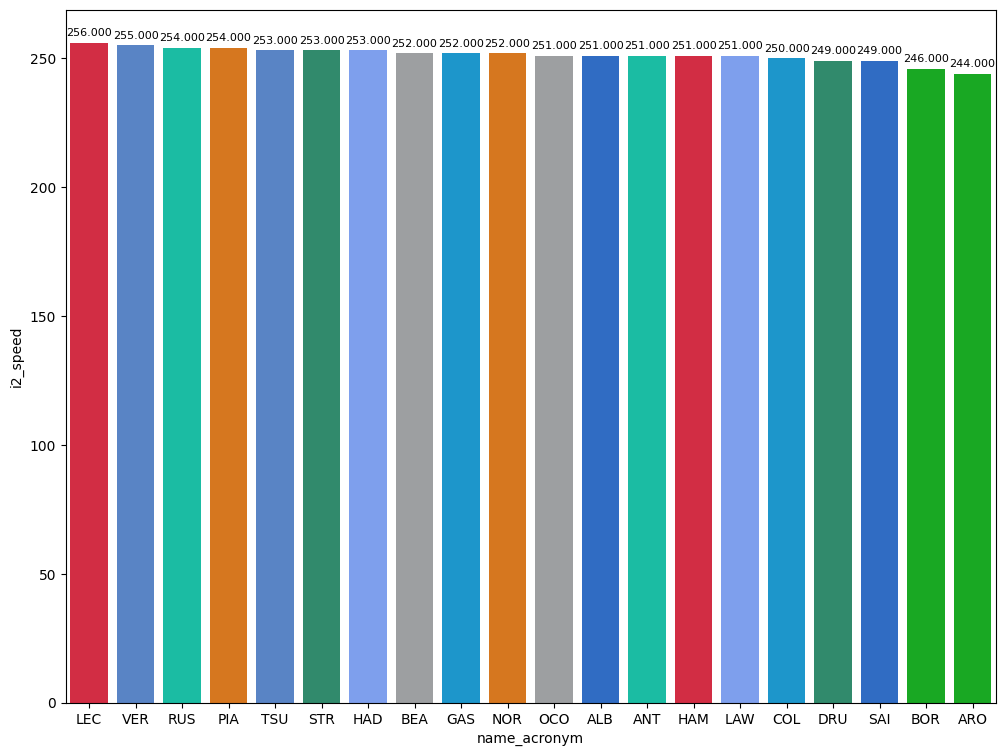

In [16]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [17]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
141,Alexander ALBON,HARD,28.373,27.735,21.758,77.866
142,Charles LECLERC,MEDIUM,28.231,27.339,21.850,77.420
209,Lando NORRIS,SOFT,28.017,26.748,21.287,76.052


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.
FP1 data is not very representative due to it is a adaptation session.
Hungaroring is a circuit where straights are important so teams as Sauber will suffer here. Haas had a good performance with both cars and teams as Aston should be competitive. It seems that qualyfing will be fought mainly for entering to Q3.

In [18]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


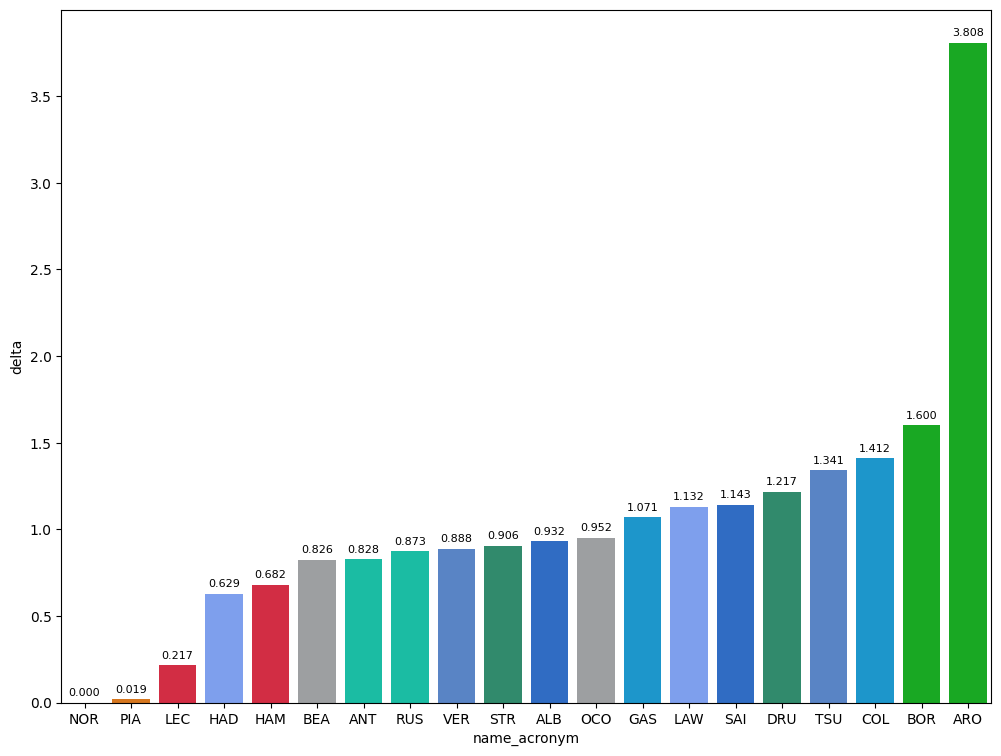

In [19]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: Albon was the fastest with a minimum difference with Hamilton. In terms to enter in Q3, Williams has to take advantage at maximum. Alpine, due to the lack of power is the slowest team. Aston has potential here and Haas suffers here.
S2: It is slowest part of the circuit, McLaren is the fastest here and Haas and Alpine has a good potential here. On the other hand, Williams suffer here.
S3: Alpine has a good potential here due to the big corner and Williams suffers here. It seems that a medium configuration is crucial here because Red Bull suffers though they are fast in sector 2.

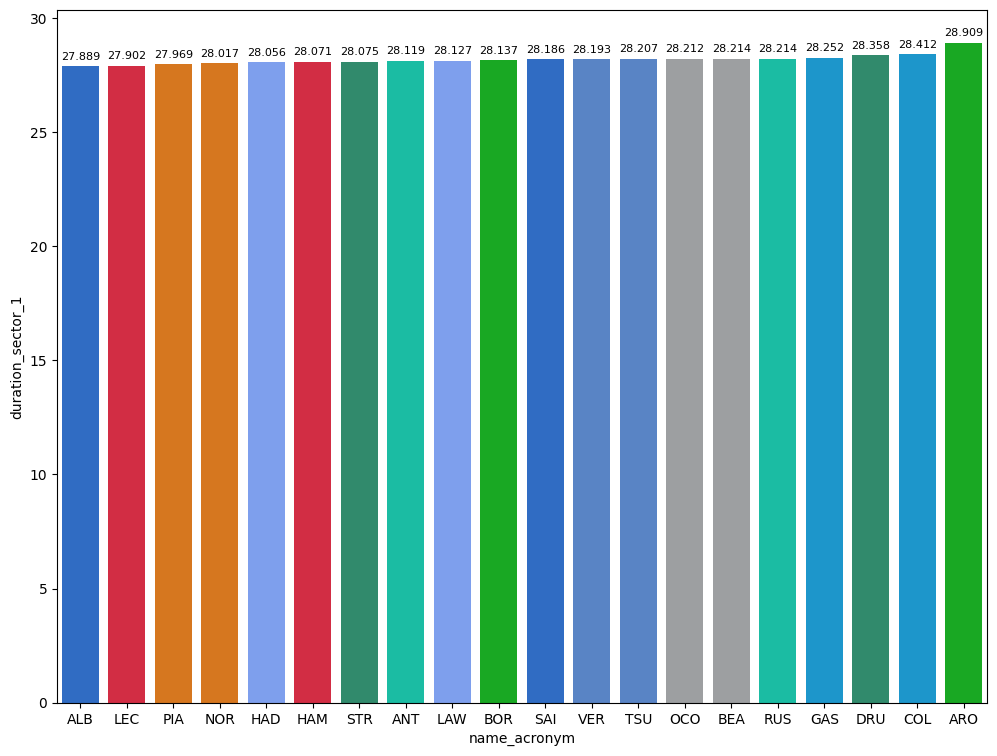

In [50]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

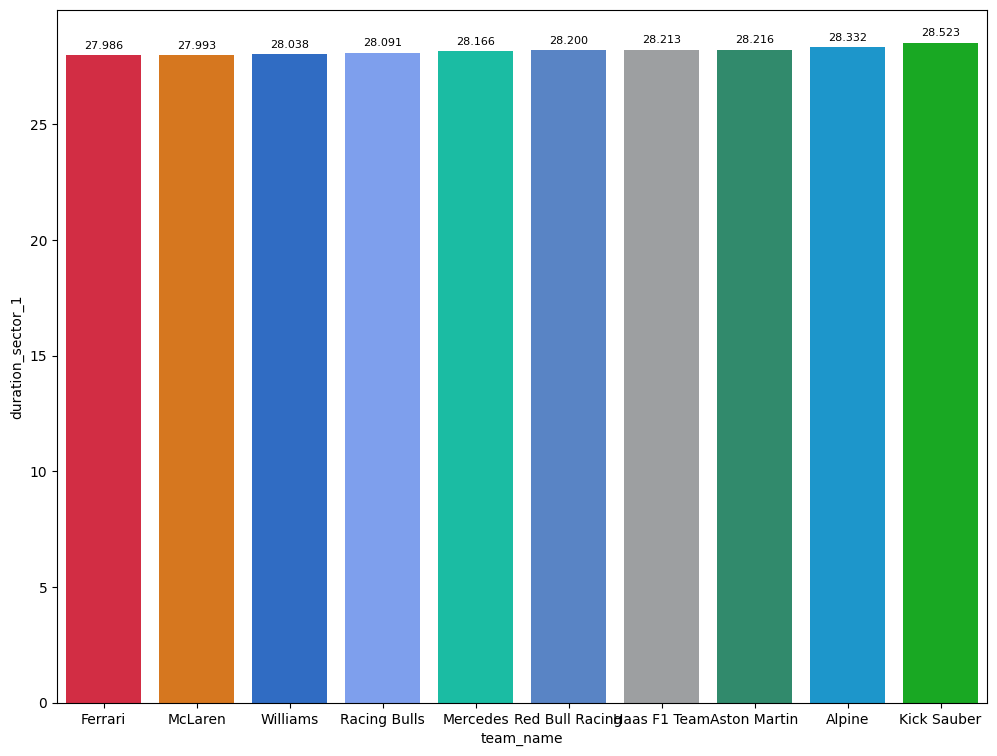

In [51]:
sectorPaceperteam = sectorPace.groupby(["team_name"]).agg({
    'duration_sector_1':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_1').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_1",sectorPaceperteam)

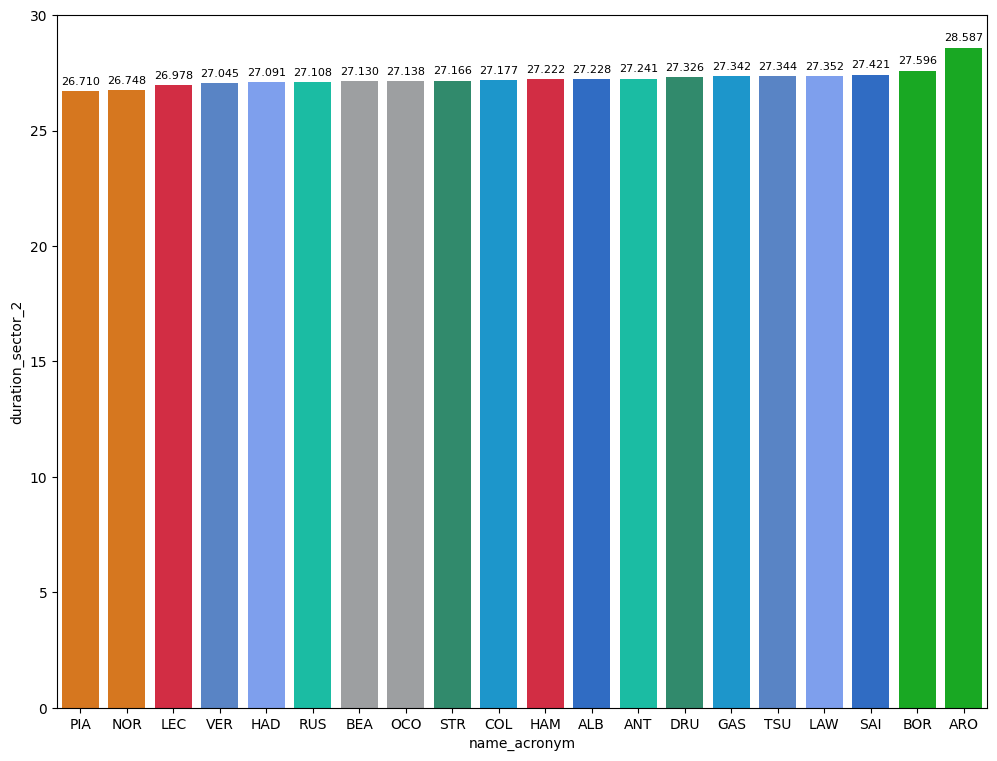

In [52]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

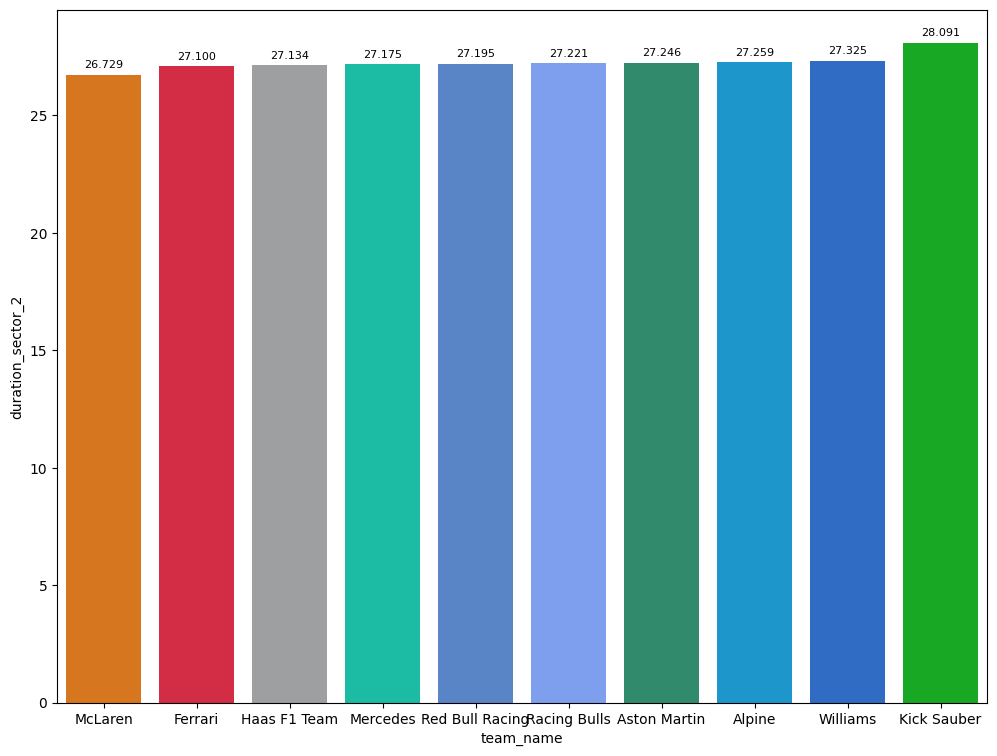

In [53]:
sectorPaceperteam = sectorPace.groupby(["team_name"]).agg({
    'duration_sector_2':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_2').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_2",sectorPaceperteam)


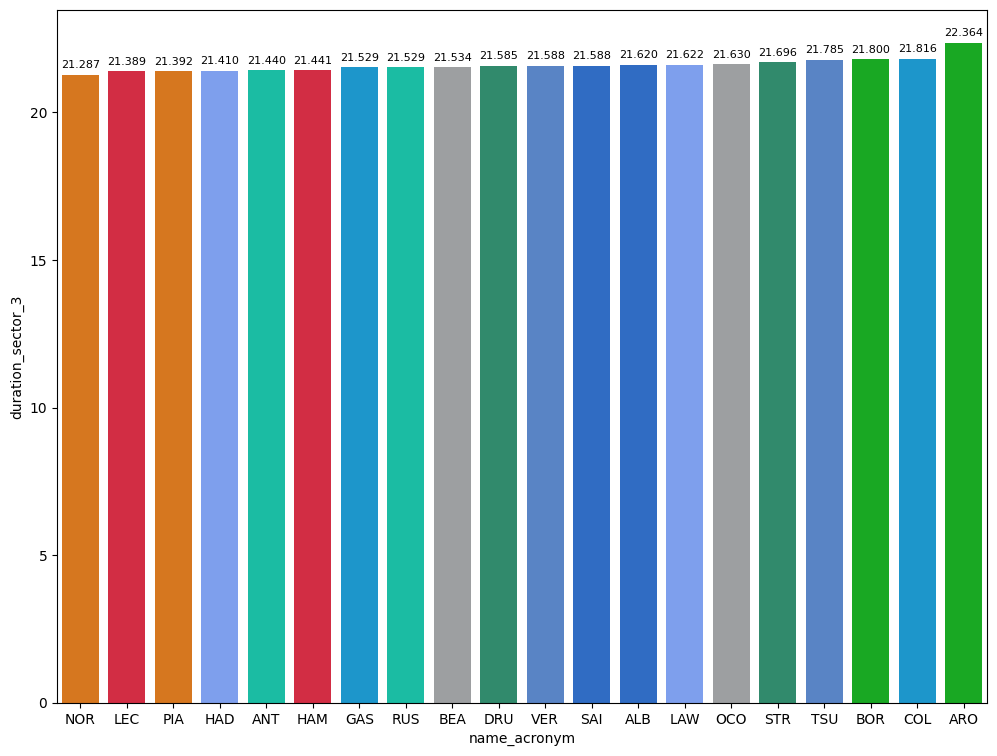

In [54]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

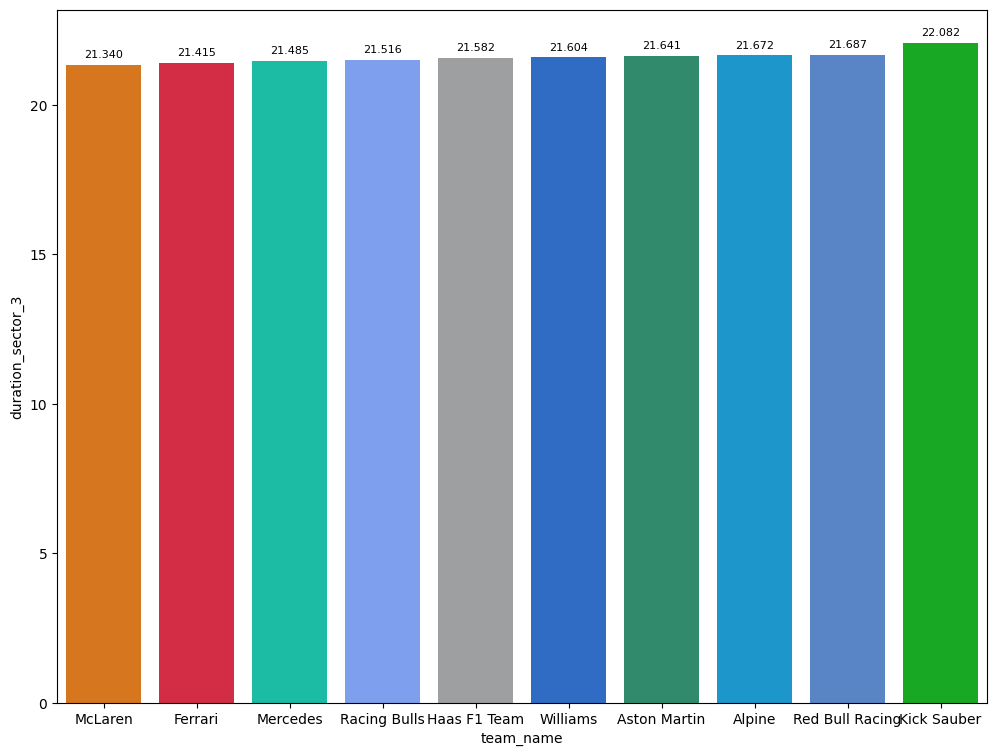

In [55]:
sectorPaceperteam = sectorPace.groupby(["team_name"]).agg({
    'duration_sector_3':'mean',
    'name_acronym':'max'
}).sort_values('duration_sector_3').reset_index()
libraryDataF1.obtainchart("team_name","duration_sector_3",sectorPaceperteam)


### Mean pace with the different compound used on the session

In [23]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 88").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
SOFT,78.118122
MEDIUM,81.380561
HARD,81.511662


## Free Practice 2
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9560)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9560)
drivers = libraryDataF1.obtain_information('drivers',session_key=9560)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>83 and lap_duration <= 86").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 83
MAXIMUM_SECONDS = 86

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables2,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [ ]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [ ]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [ ]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

##### Sorted by sector 1

In [ ]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

##### Sorted by sector 2

In [ ]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

##### Sorted by sector 3

In [ ]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

#### Long runs mean

In [ ]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"INTERMEDIATE","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

## Free Practice 3
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9561)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9561)
drivers = libraryDataF1.obtain_information('drivers',session_key=9561)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 13, 'FP3')
session.load();

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 79  and lap_duration <= 84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9562)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9562)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9562)
drivers = libraryDataF1.obtain_information('drivers',session_key=9562)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 13, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
# laptimes_deleted = [115.370,96.993,109.924,104.377,102.586,128.082,95.902,102.051]
# driver_number_lap_deleted = [4,63,1,24,22,14,55,23]

# for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
#     try:
#         id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
#         qualyfing = qualyfing.drop(id_deleted)
#     except:
#         print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 75.227 seconds (1.15.227= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (80.49 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 80.49")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-07-20T14:36:00+00:00'"
maximumDateQ2 = "date_start <'2024-07-20T14:59:00+00:00' and date_start >'2024-07-20T14:36:00+00:00'"
maximumDateQ3 = "date_start >'2024-07-20T14:59:00+00:00'"

### Qualyfing 1
In this session the surprise came from Sergio Perez that was knocked-out in this section. In the next sesssion, we will see what happened with Perez.

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. As we can see in Qualyfing 1, the qualy was very crazy, with tricky conditions at the beginning of the session. The track was wet but not to much affording to the drivers made their laps with slicks. Sergio Perez risked a bit more and touched the kerb and, with this conditions, he spun and crashed. THis incident provoked a red flag. After the red flag the session was restarted with a lot of drivers improving their times as we can see with Ricciardo being the fastest in this session. Unfortunately some drivers made their lap at the beginning, as we can see with Rusell.



In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, both Ferrari were knocked-out in Q2.

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Hamilton was very close to be knocked-out of Q2 but his third sector saved him. The last turn saved Hamilton because before to the enter of the last turn, Hulkenberg was in Q3 but the good traction of the Mercedes, afforded him to enter in Q3.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Even though the gap among the top three are so close, Norris marked his best lap in his first attemp. Piastri improved in his second attemp but it was not enough to beat Norris.
Note: All this analysis can be checked in F1 tempo

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9566)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9566)
drivers = libraryDataF1.obtain_information('drivers',session_key=9558)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >82 and lap_duration <= 87").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 82
MAXIMUM_SECONDS = 87

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9566)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration